In [1]:
import Preprocessing
import Modeling
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

from importlib import reload

In [2]:
reload(Preprocessing)

<module 'training_module' from 'c:\\Users\\82103\\Documents\\ds_study\\ML_Project\\Churn_Prediction_Team\\training_module.py'>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

%matplotlib inline
path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown')

plt.rcParams['axes.unicode_minus'] = False


In [3]:
basic_path = r'C:\Users\82103\Documents\ds_study\datas\Churn_Prediction\random_120000_user_logs'

path = r'C:\Users\82103\Documents\ds_study\datas\Churn_Prediction\random_120000_user_logs\Result'
members_path = rf'{basic_path}\random_120000_members.parquet'
train_path = rf'{basic_path}\random_120000_train.parquet'
transaction_path = rf'{basic_path}\random_120000_transaction.parquet'
user_logs_path = rf'{basic_path}\random_120000_user_logs.parquet'

basic_path_1 = r'C:\Users\82103\Documents\ds_study\datas\Churn_Prediction\sample (ratio = 0.107)'
members_path_1 = rf'{basic_path_1}\sample_members (ratio=0.107).parquet'
train_path_1 = rf'{basic_path_1}\sample_train (ratio=0.107).parquet'
transaction_path_1 = rf'{basic_path_1}\sample_transactions (ratio=0.107).parquet'
user_logs_path_1 = rf'{basic_path_1}\sample_user_logs (ratio=0.107).parquet'

In [4]:
train = Preprocessing.TrainingModule()
train_1 = Preprocessing.TrainingModule()

#### # Data Load

In [5]:
train.importData(train_path, members_path, transaction_path, user_logs_path)
train_1.importData(train_path_1 ,members_path_1 , transaction_path_1 ,user_logs_path_1 )

In [6]:
# 오리지널 / 드랍 (encoding 해야함)
gender_list_train = train.gender()

gender_list_train_1 = train_1.gender()
print(f'gender :{len(gender_list_train)}')

# 그대로 사용 / 15 ~ 64세 와 나머지
original_age_list_train = train.age()

original_age_list_train_1 = train_1.age()

# 오리지널 = 10세 구분 ,  /  오리지널 = 5세 구분 / 오리지널 = 25세 이하 or 이상
# 15 ~ 64 와 나머지 = 10세 구분 / 15 ~ 64 와 나머지 = 5세 구분 / 15 ~ 64 와 나머지 = 25세 이하 or 이상
age_category_list_train = train.ageCategory()

age_list_train = original_age_list_train + age_category_list_train
print(f'age_list_train :{len(age_list_train)}')

age_category_list_train_1 = train_1.ageCategory()
age_list_train_1 = original_age_list_train_1 + age_category_list_train_1

# 오리지널 / 이분법
city_list_train = train.cityBinary()
print(f'city :{len(city_list_train)}')

city_list_train_1 = train_1.cityBinary()

# 연속(합) / 자동구독 여부  
auto_renew_list_train = train.autoRenew()
print(f'autoRenew :{len(auto_renew_list_train)}')

auto_renew_list_train_1 = train_1.autoRenew()

# 지불방식
payment_train2 = train.paymentChange()
print(f'paymentChange :{len(payment_train2)}')

payment_train2_1 = train_1.paymentChange()

# 할인받은 기록
discount_train = train.dicountRecord()
print(f'dicountRecord :{len(discount_train)}')

discount_train_1 = train_1.dicountRecord()

# 년도월 / 년도
init_regist_list_train = train.initRegistration()
print(f'initRegistration :{len(init_regist_list_train)}')

init_regist_list_train_1 = train_1.initRegistration()


# 최초가입후 멤버쉽 결제기간 : 연thr형 / 카테고리
delay_transaction_list_train = train.delayTran()
print(f'delayTran :{len(delay_transaction_list_train)}')

delay_transaction_list_train_1 = train_1.delayTran()


# 멤버쉽 유지기간
membership_duration_train = train.membershipDuration()
print(f'membershipDuration :{len(membership_duration_train)}')

membership_duration_train_1 = train_1.membershipDuration()


# 구독 취소여부
is_cancel_train = train.isCancel()
print(f'isCancel :{len(is_cancel_train)}')

is_cancel_train_1 = train_1.isCancel()


# 장기미접속 : 연속형 / 카테고리형
logterm_unconnect_list_train = train.longTermUnconnect()
print(f'longTermUnconnect :{len(logterm_unconnect_list_train)}')

logterm_unconnect_list_train_1 = train_1.longTermUnconnect()


# 유저그룹
user_group_train = train.userLogGroup()
print(f'userLogGroup :{len(user_group_train)}')

user_group_train_1 = train_1.userLogGroup()


gender :2
age_list_train :8
city :2
autoRenew :2
paymentChange :119755
dicountRecord :119755
initRegistration :2
delayTran :119755
membershipDuration :119755
isCancel :119755
longTermUnconnect :2
userLogGroup :119499


In [12]:
y = train.train
y_1 = train_1.train

In [10]:
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib as plt

<AxesSubplot: xlabel='is_cancel', ylabel='is_churn'>

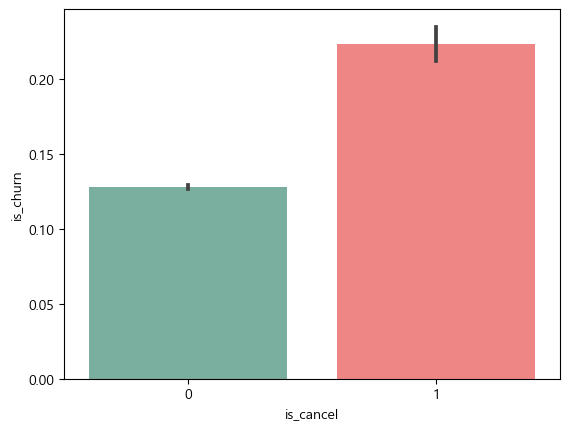

In [21]:
df_1 = pd.merge(y, is_cancel_train,on='msno_num')
df_2 = pd.merge(y_1, is_cancel_train_1, on='msno_num' )
df = pd.concat([df_1, df_2])

sns.barplot(x=df['is_cancel'], y=df['is_churn'], palette=['#72B6A1', '#FF7575'])

<AxesSubplot: xlabel='discount_record', ylabel='is_churn'>

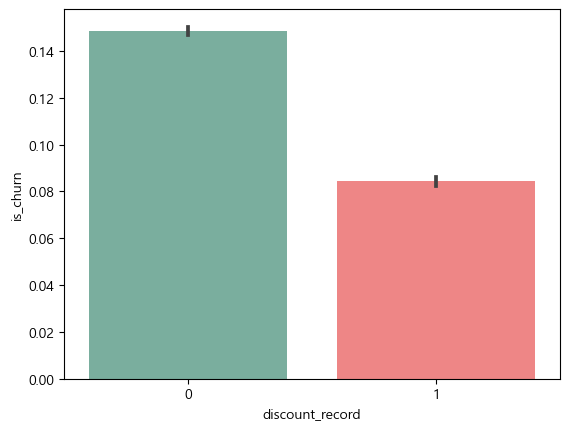

In [23]:
df_1 = pd.merge(y, discount_train, on='msno_num')
df_2 = pd.merge(y_1, discount_train_1, on='msno_num' )
df = pd.concat([df_1, df_2])

sns.barplot(x=df['discount_record'], y=df['is_churn'], palette=['#72B6A1', '#FF7575'])

In [ ]:
train_user_log = train.userlog
train_1_user_log = train_1.userlog
train_user_log = train_user_log[['msno_num','date','num_unq']].sort_values(['msno_num','date'])
train_1_user_log = train_1_user_log[['msno_num','date','num_unq']].sort_values(['msno_num','date'])
train_user_log['count'] = train_user_log.groupby('msno_num').cumcount()+1
train_1_user_log['count'] =train_1_user_log.groupby('msno_num').cumcount() +1
user_log = pd.concat([train_user_log[['msno_num','num_unq','count']],  train_1_user_log[['msno_num','num_unq','count']]])
user_log=user_log.drop_duplicates(subset=['msno_num','count'],keep='first')
X = user_log[user_log['msno_num']==22]['count']
y = user_log[user_log['msno_num']==22]['num_unq']
id = user_log.msno_num.unique()
def lin_reg(data, y, x):
    if len(data[x]) < 10:
        
        return 0

    else:
        Y = np.array(data[y]).reshape(-1,1)
        X = np.array(data[x]).reshape(-1,1)

        lin_reg = LinearRegression()

        model = lin_reg.fit(X, Y)

        coef = model.coef_[0]

        return coef[0]
user_log_grouped = user_log.groupby('msno_num').apply(lin_reg, 'num_unq', 'count')
df = pd.DataFrame(user_log_grouped).reset_index()
train_df = pd.concat([y,y_1])
train_df = train_df.drop_duplicates(subset='msno_num',keep='last')
merge_df = pd.merge(train_df , df, on='msno_num', how='inner')
merge_df
merge_df.rename(columns={0:'weight'}, inplace=True)
merge_df['weight'] = merge_df['weight'].apply(lambda x: int(x * 100))
merge_df_su = merge_df[(merge_df['weight'] >= -5) & (merge_df['weight'] <= 5)]
sns.barplot(x=merge_df_su['weight'], y=merge_df_su['is_churn'],  palette=['#72B6A1', '#FF7575'])

In [10]:
df = pd.merge(y, user_group_train,on='msno_num')

### # Feature Selection
- 첫번째, EDA 결과 바탕으로 선택(파생변수는 가급적 안넣음)
    - City Binary
    - Payment Method ID
    - init Regist (year, month)
    - membership duration
    - is_cancel 여부
    - user_log(count , per_25, per_28_75, total_play_per_unique) <<< 상관관계가 강한 것 제오;

<AxesSubplot: >

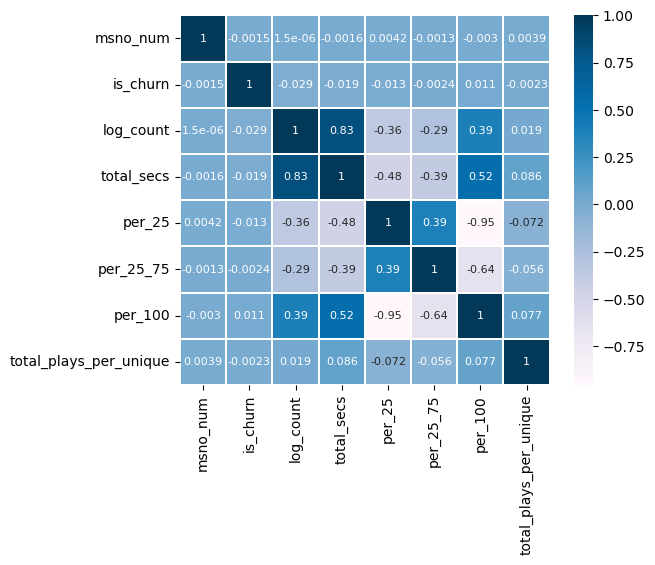

In [19]:
colormap = plt.cm.PuBu
sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})

In [25]:
user_logs = user_group_train[['msno_num','log_count','per_25','per_25_75','total_plays_per_unique']]
user_logs_1 = user_group_train_1[['msno_num','log_count','per_25','per_25_75','total_plays_per_unique']]

In [33]:
df_list = [city_list_train[1], auto_renew_list_train[1], payment_train2, init_regist_list_train[0], membership_duration_train, user_logs, y ]
df_list_1 = [city_list_train_1[1], auto_renew_list_train_1[1], payment_train2_1, init_regist_list_train_1[0], membership_duration_train_1, user_logs_1, y_1]

df = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list)
df_1 = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list_1)

df_final = pd.concat([df,df_1])
df_final = df_final.drop_duplicates(subset=['msno_num'], keep='last')

In [38]:
path = r'C:\Users\82103\Documents\ds_study\datas\Churn_Prediction\random_120000_user_logs\Result'

In [39]:
columns = ['model',
           'Train Precision', 'Test Precision', 'Train Recall','Test Recall' ,'Train_f1','Test_f1',
              'Train Matrix','Test Matrix']
result = pd.DataFrame(columns=columns)

In [40]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(df_final)
print(len(model.df))
model.trainTestSplit()

for i in range(5):
    if i == 0: 
        model.modelLightGBM()
    elif i == 1 :
        model.modelDecisionTree()
    elif i == 2:
        model.modelRandomForest()
    elif i == 3:
        model.modelLogisticRegression()
    else:       
        model.modelCatboost()             


   
    precision_train, precision_test , recall_train, recall_test, train_f1, test_f1, confusion_matrix_train , confusion_matrix_test = model.modelResult()

    sumary_list = [ model.model_name,
                    precision_train,precision_test, recall_train, recall_test, train_f1, test_f1,
                    confusion_matrix_train, confusion_matrix_test]
    
    result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)


209044
Split Complete
Learning rate set to 0.091684
0:	learn: 0.6074687	total: 169ms	remaining: 2m 48s
1:	learn: 0.5397243	total: 196ms	remaining: 1m 37s
2:	learn: 0.4868640	total: 221ms	remaining: 1m 13s
3:	learn: 0.4435699	total: 246ms	remaining: 1m 1s
4:	learn: 0.4120284	total: 275ms	remaining: 54.7s
5:	learn: 0.3860692	total: 304ms	remaining: 50.3s
6:	learn: 0.3677222	total: 331ms	remaining: 46.9s
7:	learn: 0.3520316	total: 358ms	remaining: 44.4s
8:	learn: 0.3402035	total: 383ms	remaining: 42.2s
9:	learn: 0.3295033	total: 409ms	remaining: 40.5s
10:	learn: 0.3211120	total: 436ms	remaining: 39.2s
11:	learn: 0.3144648	total: 460ms	remaining: 37.9s
12:	learn: 0.3095536	total: 487ms	remaining: 37s
13:	learn: 0.3054253	total: 512ms	remaining: 36s
14:	learn: 0.3014579	total: 537ms	remaining: 35.2s
15:	learn: 0.2992072	total: 564ms	remaining: 34.7s
16:	learn: 0.2965944	total: 587ms	remaining: 34s
17:	learn: 0.2945048	total: 610ms	remaining: 33.3s
18:	learn: 0.2929210	total: 633ms	remaining

In [42]:
result.to_csv('Test_1.csv')
# 가장기본

#### # 나이컬럼과 젠더 컬럼 추가

In [ ]:
age_category_list_train
age_category_list_train_1

In [ ]:
gender_list_train
gender_list_train_1

In [46]:
gender_list_train[0]

,msno_num,gender
0,48,0
1,965,1
2,1325,0
3,2959,0
4,3101,2
...,...,...
119769,7372149,0
119770,7372692,1
119771,7373542,1
119772,7375228,0


In [52]:
age_null = y[['msno_num']]
age_null_1 = y_1[['msno_num']]

In [53]:
age_category_list_train.append(age_null)
age_category_list_train_1.append(age_null_1)


In [70]:
len(age_category_list_train)

8

In [60]:
columns = ['model', 'age_category',
           'Train Precision', 'Test Precision', 'Train Recall','Test Recall' ,'Train_f1','Test_f1',
              'Train Matrix','Test Matrix']
result = pd.DataFrame(columns=columns)

In [65]:
gender_list_train[1]

,msno_num
0,48
1,965
2,1325
3,2959
4,3101
...,...
119769,7372149
119770,7372692
119771,7373542
119772,7375228


In [66]:
for row in range(len(age_category_list_train)):
    df_list = [age_category_list_train[row],gender_list_train[1],city_list_train[1], auto_renew_list_train[1], payment_train2, init_regist_list_train[0], membership_duration_train, user_logs, y ]
    df_list_1 = [age_category_list_train_1[row],gender_list_train_1[1],city_list_train_1[1], auto_renew_list_train_1[1], payment_train2_1, init_regist_list_train_1[0], membership_duration_train_1, user_logs_1, y_1]

    df = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list)
    df_1 = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list_1)

    df_final = pd.concat([df,df_1])
    print(df_final)
    df_final = df_final.drop_duplicates(subset=['msno_num'], keep='last')

    model = Modeling.ModelingModule(path=path)
    model.getDataFrame(df_final)
    print(len(df_final))
    model.trainTestSplit()

    for i in range(5):
        if i == 0: 
            model.modelLightGBM()
        elif i == 1 :
            model.modelDecisionTree()
        elif i == 2:
            model.modelRandomForest()
        elif i == 3:
            model.modelLogisticRegression()
        else:       
            model.modelCatboost()             


    
        precision_train, precision_test , recall_train, recall_test, train_f1, test_f1, confusion_matrix_train , confusion_matrix_test = model.modelResult()

        sumary_list = [ model.model_name, row,
                        precision_train,precision_test, recall_train, recall_test, train_f1, test_f1,
                        confusion_matrix_train, confusion_matrix_test]
        
        result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)


        msno_num  bd  city  is_auto_renew  change  registration_init_time  \
0             48   5     1              1       0                  201603   
1            965   1     0              1       0                  201110   
2           1325   5     1              1       0                  201511   
3           2959   5     1              1       0                  201401   
4           3101   1     0              1       0                  201606   
...          ...  ..   ...            ...     ...                     ...   
102520   7365099   1     0              1       1                  200805   
102521   7367484   5     1              1       0                  201508   
102522   7367994   5     1              0       1                  201605   
102523   7373743   5     1              1       0                  201107   
102524   7374450   5     1              1       0                  201601   

        duration  log_count    per_25  per_25_75  total_plays_per_unique  \

IndexError: list index out of range

In [67]:
result

,model,age_category,Train Precision,Test Precision,Train Recall,Test Recall,Train_f1,Test_f1,Train Matrix,Test Matrix
0,LGBM,0,0.738000,0.703168,0.391449,0.372832,0.511558,0.487293,"[[142541, 3013], [13194, 8487]]","[[35470, 862], [3435, 2042]]"
1,LGBM,0,0.738000,0.703168,0.391449,0.372832,0.511558,0.487293,"[[142541, 3013], [13194, 8487]]","[[35470, 862], [3435, 2042]]"
2,LGBM,0,0.738000,0.703168,0.391449,0.372832,0.511558,0.487293,"[[142541, 3013], [13194, 8487]]","[[35470, 862], [3435, 2042]]"
3,LGBM,0,0.732631,0.705256,0.391541,0.374840,0.510340,0.489509,"[[142456, 3098], [13192, 8489]]","[[35474, 858], [3424, 2053]]"
4,DecisionTree,0,1.000000,0.430548,0.999631,0.443126,0.999815,0.436746,"[[145554, 0], [8, 21673]]","[[33122, 3210], [3050, 2427]]"
5,RandomForest,0,1.000000,0.659406,0.999493,0.364798,0.999746,0.469731,"[[145554, 0], [11, 21670]]","[[35300, 1032], [3479, 1998]]"
6,LogisticRegression,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,"[[145554, 0], [21681, 0]]","[[36332, 0], [5477, 0]]"
7,Catboost,0,0.784695,0.694971,0.463955,0.421399,0.583130,0.524665,"[[142794, 2760], [11622, 10059]]","[[35319, 1013], [3169, 2308]]"
8,LGBM,1,0.740947,0.703451,0.392602,0.375936,0.513250,0.490005,"[[142578, 2976], [13169, 8512]]","[[35464, 868], [3418, 2059]]"
9,DecisionTree,1,1.000000,0.433423,0.999631,0.442761,0.999815,0.438042,"[[145554, 0], [8, 21673]]","[[33162, 3170], [3052, 2425]]"


In [68]:
result.to_csv('Test_2.csv')
# gender, 나이컬럼 추가

In [71]:
columns = ['model', 'age_category',
           'Train Precision', 'Test Precision', 'Train Recall','Test Recall' ,'Train_f1','Test_f1',
              'Train Matrix','Test Matrix']
result = pd.DataFrame(columns=columns)

In [72]:
for row in range(len(age_category_list_train)):
    df_list = [age_category_list_train[row],gender_list_train[0],city_list_train[1], auto_renew_list_train[1], payment_train2, init_regist_list_train[0], membership_duration_train, user_logs, y ]
    df_list_1 = [age_category_list_train_1[row],gender_list_train_1[0],city_list_train_1[1], auto_renew_list_train_1[1], payment_train2_1, init_regist_list_train_1[0], membership_duration_train_1, user_logs_1, y_1]

    df = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list)
    df_1 = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list_1)

    df_final = pd.concat([df,df_1])
    print(df_final)
    df_final = df_final.drop_duplicates(subset=['msno_num'], keep='last')

    model = Modeling.ModelingModule(path=path)
    model.getDataFrame(df_final)
    print(len(df_final))
    model.trainTestSplit()

    for i in range(5):
        if i == 0: 
            model.modelLightGBM()
        elif i == 1 :
            model.modelDecisionTree()
        elif i == 2:
            model.modelRandomForest()
        elif i == 3:
            model.modelLogisticRegression()
        else:       
            model.modelCatboost()             


    
        precision_train, precision_test , recall_train, recall_test, train_f1, test_f1, confusion_matrix_train , confusion_matrix_test = model.modelResult()

        sumary_list = [ model.model_name, row,
                        precision_train,precision_test, recall_train, recall_test, train_f1, test_f1,
                        confusion_matrix_train, confusion_matrix_test]
        
        result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)


        msno_num  bd  gender  city  is_auto_renew  change  \
0             48   5       0     1              1       0   
1            965   1       1     0              1       0   
2           1325   5       0     1              1       0   
3           2959   5       0     1              1       0   
4           3101   1       2     0              1       0   
...          ...  ..     ...   ...            ...     ...   
102520   7365099   1       1     0              1       1   
102521   7367484   5       0     1              1       0   
102522   7367994   5       0     1              0       1   
102523   7373743   5       0     1              1       0   
102524   7374450   5       0     1              1       0   

        registration_init_time  duration  log_count    per_25  per_25_75  \
0                       201603        13   7.461538  0.194069   0.118498   
1                       201110        28   8.666667  0.141542   0.093874   
2                       201511        1

IndexError: list index out of range

In [73]:
result

,model,age_category,Train Precision,Test Precision,Train Recall,Test Recall,Train_f1,Test_f1,Train Matrix,Test Matrix
0,LGBM,0,0.735650,0.699726,0.392510,0.373562,0.511895,0.487085,"[[142496, 3058], [13171, 8510]]","[[35454, 878], [3431, 2046]]"
1,DecisionTree,0,1.000000,0.430516,0.999631,0.444586,0.999815,0.437438,"[[145554, 0], [8, 21673]]","[[33111, 3221], [3042, 2435]]"
2,RandomForest,0,1.000000,0.661182,0.999262,0.359503,0.999631,0.465760,"[[145554, 0], [16, 21665]]","[[35323, 1009], [3508, 1969]]"
3,LogisticRegression,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,"[[145554, 0], [21681, 0]]","[[36332, 0], [5477, 0]]"
4,Catboost,0,0.786004,0.692214,0.464693,0.415556,0.584075,0.519338,"[[142811, 2743], [11606, 10075]]","[[35320, 1012], [3201, 2276]]"
5,LGBM,1,0.739688,0.703945,0.391218,0.374658,0.511765,0.489037,"[[142569, 2985], [13199, 8482]]","[[35469, 863], [3425, 2052]]"
6,DecisionTree,1,1.000000,0.428983,0.999631,0.434544,0.999815,0.431746,"[[145554, 0], [8, 21673]]","[[33164, 3168], [3097, 2380]]"
7,RandomForest,1,1.000000,0.652101,0.999354,0.356947,0.999677,0.461357,"[[145554, 0], [14, 21667]]","[[35289, 1043], [3522, 1955]]"
8,LogisticRegression,1,0.000000,0.000000,0.000000,0.000000,NaN,NaN,"[[145554, 0], [21681, 0]]","[[36332, 0], [5477, 0]]"
9,Catboost,1,0.786824,0.695864,0.469351,0.417747,0.587970,0.522076,"[[142797, 2757], [11505, 10176]]","[[35332, 1000], [3189, 2288]]"


- gender 와 나이 컬럼 있을때와 없을때 비슷
<br></br>
- 최고점을 기준으로 높긴하다! age 2번, 젠더는 가지고 가기
<br></br>
- Catbiist , LGBM 잘 나온다

#### # Tree 계열 약간 손보기

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix ,accuracy_score
from sklearn.model_selection import GridSearchCV

In [80]:
df_list = [city_list_train[1], auto_renew_list_train[1], payment_train2, init_regist_list_train[0], membership_duration_train, user_logs, y ]
df_list_1 = [city_list_train_1[1], auto_renew_list_train_1[1], payment_train2_1, init_regist_list_train_1[0], membership_duration_train_1, user_logs_1, y_1]

df = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list)
df_1 = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list_1)

df_final = pd.concat([df,df_1])
df_final = df_final.drop_duplicates(subset=['msno_num'], keep='last')
df_final

,msno_num,city,is_auto_renew,change,registration_init_time,duration,log_count,per_25,per_25_75,total_plays_per_unique,is_churn
0,48,1,1,0,201603,13,7.461538,0.194069,0.118498,1.110315,0
1,965,0,1,0,201110,28,8.666667,0.141542,0.093874,1.997418,0
2,1325,1,1,0,201511,16,7.785714,0.235752,0.049688,1.214396,1
3,2959,1,1,0,201401,15,19.533333,0.065174,0.018882,1.136097,0
4,3101,0,1,0,201606,9,7.222222,0.113107,0.032986,1.132329,0
...,...,...,...,...,...,...,...,...,...,...,...
102520,7365099,0,1,1,200805,8,17.857143,0.109071,0.024301,1.063458,0
102521,7367484,1,1,0,201508,20,5.526316,0.375084,0.122788,1.326613,0
102522,7367994,1,0,1,201605,11,18.000000,0.191700,0.087212,1.290526,0
102523,7373743,1,1,0,201107,27,1.400000,0.030928,0.041237,1.102273,0


#### Decision Tree

In [82]:
columns = ['model', 'best_param',
           'Train Precision', 'Test Precision', 'Train Recall','Test Recall','accuracy' ,'Train_f1','Test_f1',
              'Train Matrix','Test Matrix']
result = pd.DataFrame(columns=columns)

In [84]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(df_final)
print(len(df_final))
model.trainTestSplit()

tree_param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

X_train = model.X_train
X_test = model.X_test
y_train = model.y_train
y_test = model.y_test



model = DecisionTreeClassifier()
best = GridSearchCV(model, param_grid=tree_param_grid,cv=5, refit=True, return_train_score=True)

best.fit(X_train, y_train)


y_pred_tr = best.predict(X_train)
y_pred_test = best.predict(X_test)
precision_train = precision_score(y_train, y_pred_tr)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_tr)
recall_test = recall_score(y_test, y_pred_test)
train_f1 =  (2 *precision_train *recall_train) / (precision_train + recall_train)
test_f1 =  (2 *precision_test *recall_test) / (precision_test + recall_test)
confusion_matrix_train = confusion_matrix(y_train, y_pred_tr)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_score = accuracy_score(y_test, y_pred_test)


sumary_list = [ 'DecisionTree',best.best_params_,
                    precision_train,precision_test, recall_train, recall_test,accuracy_score, train_f1, test_f1,
                    confusion_matrix_train, confusion_matrix_test]
    
result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)


209044
Split Complete


In [85]:
result

,model,best_param,Train Precision,Test Precision,Train Recall,Test Recall,accuracy,Train_f1,Test_f1,Train Matrix,Test Matrix
0,DecisionTree,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",0.670156,0.61571,0.259859,0.238999,0.880767,0.374501,0.344338,"[[142781, 2773], [16047, 5634]]","[[35515, 817], [4168, 1309]]"


In [86]:
columns = ['model', 'best_param',
           'Train Precision', 'Test Precision', 'Train Recall','Test Recall','accuracy' ,'Train_f1','Test_f1',
              'Train Matrix','Test Matrix']
result = pd.DataFrame(columns=columns)

In [91]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(df_final)
print(len(df_final))
model.trainTestSplit()

# forest_param_grid = {
#     'n_estimators': [150, 200],
#     'max_depth': [2, 4, 6],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 2, 3],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

X_train = model.X_train
X_test = model.X_test
y_train = model.y_train
y_test = model.y_test



model = RandomForestClassifier(n_estimators=200)
#best = GridSearchCV(model, param_grid=forest_param_grid, cv=5, refit=True, return_train_score=True)

model.fit(X_train, y_train)


209044
Split Complete


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [95]:
from sklearn.metrics import accuracy_score

In [96]:

y_pred_tr = model.predict(X_train)
y_pred_test = model.predict(X_test)
precision_train = precision_score(y_train, y_pred_tr)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_tr)
recall_test = recall_score(y_test, y_pred_test)
train_f1 =  (2 *precision_train *recall_train) / (precision_train + recall_train)
test_f1 =  (2 *precision_test *recall_test) / (precision_test + recall_test)
confusion_matrix_train = confusion_matrix(y_train, y_pred_tr)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
sumary_list = ['RandomForest','200',
                    precision_train,precision_test, recall_train, recall_test,accuracy_test, train_f1, test_f1,
                    confusion_matrix_train, confusion_matrix_test]
    
result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)


In [97]:
result

,model,best_param,Train Precision,Test Precision,Train Recall,Test Recall,accuracy,Train_f1,Test_f1,Train Matrix,Test Matrix
0,RandomForest,200,1.0,0.650211,0.999631,0.365529,0.891124,0.999815,0.467976,"[[145554, 0], [8, 21673]]","[[35255, 1077], [3475, 2002]]"


#### Randomforest 는 하이퍼파라미터 조정으로 해결하기 어려워 보임,,
- selectKBest
<br></br>
- PCA 사용해보자

#### SelectKBest

In [99]:
df_final.columns

Index(['msno_num', 'city', 'is_auto_renew', 'change', 'registration_init_time',
       'duration', 'log_count', 'per_25', 'per_25_75',
       'total_plays_per_unique', 'is_churn'],
      dtype='object')

In [ ]:
columns = ['model', 'k',
           'Train Precision', 'Test Precision', 'Train Recall','Test Recall','accuracy' ,'Train_f1','Test_f1',
              'Train Matrix','Test Matrix']
result = pd.DataFrame(columns=columns)

In [101]:
for i in range(3,9):
    model = Modeling.ModelingModule(path=path)
    model.getDataFrame(df_final)
    model.trainTestSplit()
    model.selectBest(num=i)

    X_train = model.X_train
    X_test = model.X_test
    y_train = model.y_train
    y_test = model.y_test

    model = RandomForestClassifier(n_estimators=300)
    model.fit(X_train, y_train)

    y_pred_tr = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    precision_train = precision_score(y_train, y_pred_tr)
    precision_test = precision_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_tr)
    recall_test = recall_score(y_test, y_pred_test)
    train_f1 =  (2 *precision_train *recall_train) / (precision_train + recall_train)
    test_f1 =  (2 *precision_test *recall_test) / (precision_test + recall_test)
    confusion_matrix_train = confusion_matrix(y_train, y_pred_tr)
    confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    sumary_list = ['RandomForest',i,
                        precision_train,precision_test, recall_train, recall_test,accuracy_test, train_f1, test_f1,
                        confusion_matrix_train, confusion_matrix_test]
        
    result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)



Split Complete
Split Complete
Split Complete
Split Complete
Split Complete
Split Complete


In [102]:
result

,model,best_param,Train Precision,Test Precision,Train Recall,Test Recall,accuracy,Train_f1,Test_f1,Train Matrix,Test Matrix
0,RandomForest,200,1.000000,0.650211,0.999631,0.365529,0.891124,0.999815,0.467976,"[[145554, 0], [8, 21673]]","[[35255, 1077], [3475, 2002]]"
1,RandomForest,3,0.687477,0.667133,0.264102,0.261274,0.886149,0.381606,0.375492,"[[142951, 2603], [15955, 5726]]","[[35618, 714], [4046, 1431]]"
2,RandomForest,4,0.672587,0.647517,0.296942,0.288114,0.886197,0.411992,0.398787,"[[142420, 3134], [15243, 6438]]","[[35473, 859], [3899, 1578]]"
3,RandomForest,5,0.927218,0.486659,0.724505,0.362972,0.866392,0.813422,0.415813,"[[144321, 1233], [5973, 15708]]","[[34235, 2097], [3489, 1988]]"
4,RandomForest,6,0.989694,0.572864,0.956690,0.437101,0.883566,0.972912,0.495857,"[[145338, 216], [939, 20742]]","[[34547, 1785], [3083, 2394]]"
5,RandomForest,7,1.000000,0.630796,0.998616,0.394924,0.890454,0.999308,0.485740,"[[145554, 0], [30, 21651]]","[[35066, 1266], [3314, 2163]]"
6,RandomForest,8,1.000000,0.651840,0.999447,0.371919,0.891698,0.999723,0.473611,"[[145554, 0], [12, 21669]]","[[35244, 1088], [3440, 2037]]"


##### PCA

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
import numpy as np

In [111]:
X = df_final.drop(columns=['msno_num','is_churn'])

In [112]:
ascaler = StandardScaler()
X_pca = scaler.fit_transform(X)

In [ ]:
pca = PCA()
df_pca = pca.fit_transform(X_pca)


In [114]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.256672
1    0.408013
2    0.555616
3    0.664871
4    0.745431
5    0.823746
6    0.891691
7    0.954654
8    1.000000
dtype: float64

In [117]:
for k in range(5,8):
    model = Modeling.ModelingModule(path=path)
    model.getDataFrame(df_final)
    model.trainTestSplit()
    model.standardScaling()

    pca = PCA(n_components=k)
    pca.fit(model.X_train)
    X_train = pca.transform(model.X_train)
    X_test = pca.transform(model.X_test)
    y_train = model.y_train
    y_test = model.y_test

    model = RandomForestClassifier(n_estimators=350)
    model.fit(X_train, y_train)

    y_pred_tr = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    precision_train = precision_score(y_train, y_pred_tr)
    precision_test = precision_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_tr)
    recall_test = recall_score(y_test, y_pred_test)
    train_f1 =  (2 *precision_train *recall_train) / (precision_train + recall_train)
    test_f1 =  (2 *precision_test *recall_test) / (precision_test + recall_test)
    confusion_matrix_train = confusion_matrix(y_train, y_pred_tr)
    confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    sumary_list = ['RandomForest',k,
                        precision_train,precision_test, recall_train, recall_test,accuracy_test, train_f1, test_f1,
                        confusion_matrix_train, confusion_matrix_test]
        
    result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)



Split Complete
Split Complete
Split Complete


In [118]:
result

,model,best_param,Train Precision,Test Precision,Train Recall,Test Recall,accuracy,Train_f1,Test_f1,Train Matrix,Test Matrix
0,RandomForest,200,1.000000,0.650211,0.999631,0.365529,0.891124,0.999815,0.467976,"[[145554, 0], [8, 21673]]","[[35255, 1077], [3475, 2002]]"
1,RandomForest,3,0.687477,0.667133,0.264102,0.261274,0.886149,0.381606,0.375492,"[[142951, 2603], [15955, 5726]]","[[35618, 714], [4046, 1431]]"
2,RandomForest,4,0.672587,0.647517,0.296942,0.288114,0.886197,0.411992,0.398787,"[[142420, 3134], [15243, 6438]]","[[35473, 859], [3899, 1578]]"
3,RandomForest,5,0.927218,0.486659,0.724505,0.362972,0.866392,0.813422,0.415813,"[[144321, 1233], [5973, 15708]]","[[34235, 2097], [3489, 1988]]"
4,RandomForest,6,0.989694,0.572864,0.956690,0.437101,0.883566,0.972912,0.495857,"[[145338, 216], [939, 20742]]","[[34547, 1785], [3083, 2394]]"
5,RandomForest,7,1.000000,0.630796,0.998616,0.394924,0.890454,0.999308,0.485740,"[[145554, 0], [30, 21651]]","[[35066, 1266], [3314, 2163]]"
6,RandomForest,8,1.000000,0.651840,0.999447,0.371919,0.891698,0.999723,0.473611,"[[145554, 0], [12, 21669]]","[[35244, 1088], [3440, 2037]]"
7,RandomForest,5,1.000000,0.537009,0.999631,0.259631,0.873687,0.999815,0.350031,"[[145554, 0], [8, 21673]]","[[35106, 1226], [4055, 1422]]"
8,RandomForest,6,1.000000,0.541840,0.999631,0.261274,0.874285,0.999815,0.352550,"[[145554, 0], [8, 21673]]","[[35122, 1210], [4046, 1431]]"
9,RandomForest,7,1.000000,0.555597,0.999631,0.269125,0.876055,0.999815,0.362608,"[[145554, 0], [8, 21673]]","[[35153, 1179], [4003, 1474]]"


#### 데이터 수가 많이 부족해 보인다...!
- 처음 돌린게 가장 좋다 아직

### # 파생변수 넣기
- 지불방식 변경여부
<br></br>
- discount record
<br></br>
- lognterm unconnect

In [122]:
logterm_unconnect_list_train[0]

,msno_num,unconnected
0,48,0
1,53,0
2,90,0
3,160,0
4,225,0
...,...,...
119494,7376919,0
119495,7376935,0
119496,7376940,0
119497,7376982,0


In [133]:
df_list = [age_category_list_train[2],gender_list_train[0],city_list_train[1], auto_renew_list_train[1],discount_train, init_regist_list_train[0], logterm_unconnect_list_train[0],membership_duration_train, user_logs, y ]
df_list_1 = [age_category_list_train_1[2],gender_list_train_1[0],city_list_train_1[1], auto_renew_list_train_1[1], discount_train_1 , logterm_unconnect_list_train_1[0],payment_train2_1, init_regist_list_train_1[0], membership_duration_train_1, user_logs_1, y_1]

df = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list)
df_1 = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list_1)

df_final = pd.concat([df,df_1])
df_final = df_final.drop_duplicates(subset=['msno_num'], keep='last')
df_final

,msno_num,bd,gender,city,is_auto_renew,discount_record,registration_init_time,unconnected,duration,log_count,per_25,per_25_75,total_plays_per_unique,is_churn,change
0,48,-1,0,1,1,0,201603,0,13,7.461538,0.194069,0.118498,1.110315,0,NaN
1,965,1,1,0,1,1,201110,0,28,8.666667,0.141542,0.093874,1.997418,0,NaN
2,1325,-1,0,1,1,0,201511,0,16,7.785714,0.235752,0.049688,1.214396,1,NaN
3,2959,-1,0,1,1,0,201401,0,15,19.533333,0.065174,0.018882,1.136097,0,NaN
4,3101,1,2,0,1,0,201606,0,9,7.222222,0.113107,0.032986,1.132329,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102520,7365099,1,1,0,1,0,200805,0,8,17.857143,0.109071,0.024301,1.063458,0,1.0
102521,7367484,-1,0,1,1,0,201508,0,20,5.526316,0.375084,0.122788,1.326613,0,0.0
102522,7367994,-1,0,1,0,0,201605,0,11,18.000000,0.191700,0.087212,1.290526,0,1.0
102523,7373743,-1,0,1,1,1,201107,0,27,1.400000,0.030928,0.041237,1.102273,0,0.0


In [138]:
columns = ['model',
           'Train Precision', 'Test Precision', 'Train Recall','Test Recall' ,'Train_f1','Test_f1',
              'Train Matrix','Test Matrix']
result = pd.DataFrame(columns=columns)

In [139]:
## Catboost	2	0.781593	0.694336	0.466122	0.423042	0.583976	0.525754
## LGBM 	5	0.741532	0.708433	0.390757	0.378857

In [140]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(df_final)
print(len(df_final))
model.trainTestSplit()

model.modelCatboost() 

precision_train, precision_test , recall_train, recall_test, train_f1, test_f1, confusion_matrix_train , confusion_matrix_test = model.modelResult()

sumary_list = [ model.model_name, 
            precision_train,precision_test, recall_train, recall_test, train_f1, test_f1,
            confusion_matrix_train, confusion_matrix_test]

result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)


209044
Split Complete
Learning rate set to 0.091684
0:	learn: 0.6069058	total: 24.7ms	remaining: 24.6s
1:	learn: 0.5392638	total: 54.2ms	remaining: 27.1s
2:	learn: 0.4875374	total: 87.5ms	remaining: 29.1s
3:	learn: 0.4446865	total: 118ms	remaining: 29.3s
4:	learn: 0.4136085	total: 148ms	remaining: 29.5s
5:	learn: 0.3892800	total: 175ms	remaining: 29s
6:	learn: 0.3703705	total: 199ms	remaining: 28.2s
7:	learn: 0.3551042	total: 229ms	remaining: 28.3s
8:	learn: 0.3438740	total: 259ms	remaining: 28.5s
9:	learn: 0.3345814	total: 288ms	remaining: 28.5s
10:	learn: 0.3261633	total: 318ms	remaining: 28.6s
11:	learn: 0.3195369	total: 347ms	remaining: 28.6s
12:	learn: 0.3139865	total: 375ms	remaining: 28.5s
13:	learn: 0.3089364	total: 406ms	remaining: 28.6s
14:	learn: 0.3051463	total: 434ms	remaining: 28.5s
15:	learn: 0.3016890	total: 463ms	remaining: 28.5s
16:	learn: 0.2991125	total: 492ms	remaining: 28.5s
17:	learn: 0.2973097	total: 522ms	remaining: 28.5s
18:	learn: 0.2948542	total: 553ms	remai

In [141]:
result

,model,Train Precision,Test Precision,Train Recall,Test Recall,Train_f1,Test_f1,Train Matrix,Test Matrix
0,Catboost,0.779007,0.694378,0.471011,0.423955,0.587065,0.526471,"[[142657, 2897], [11469, 10212]]","[[35310, 1022], [3155, 2322]]"


In [142]:
df_list = [age_category_list_train[5],gender_list_train[0],city_list_train[1], auto_renew_list_train[1],discount_train, init_regist_list_train[0], logterm_unconnect_list_train[0],membership_duration_train, user_logs, y ]
df_list_1 = [age_category_list_train_1[5],gender_list_train_1[0],city_list_train_1[1], auto_renew_list_train_1[1], discount_train_1 , logterm_unconnect_list_train_1[0],payment_train2_1, init_regist_list_train_1[0], membership_duration_train_1, user_logs_1, y_1]

df = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list)
df_1 = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list_1)

df_final = pd.concat([df,df_1])
df_final = df_final.drop_duplicates(subset=['msno_num'], keep='last')
df_final

,msno_num,bd,gender,city,is_auto_renew,discount_record,registration_init_time,unconnected,duration,log_count,per_25,per_25_75,total_plays_per_unique,is_churn,change
0,48,-1,0,1,1,0,201603,0,13,7.461538,0.194069,0.118498,1.110315,0,NaN
1,965,1,1,0,1,1,201110,0,28,8.666667,0.141542,0.093874,1.997418,0,NaN
2,1325,-1,0,1,1,0,201511,0,16,7.785714,0.235752,0.049688,1.214396,1,NaN
3,2959,-1,0,1,1,0,201401,0,15,19.533333,0.065174,0.018882,1.136097,0,NaN
4,3101,1,2,0,1,0,201606,0,9,7.222222,0.113107,0.032986,1.132329,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102520,7365099,1,1,0,1,0,200805,0,8,17.857143,0.109071,0.024301,1.063458,0,1.0
102521,7367484,-1,0,1,1,0,201508,0,20,5.526316,0.375084,0.122788,1.326613,0,0.0
102522,7367994,-1,0,1,0,0,201605,0,11,18.000000,0.191700,0.087212,1.290526,0,1.0
102523,7373743,-1,0,1,1,1,201107,0,27,1.400000,0.030928,0.041237,1.102273,0,0.0


In [143]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(df_final)
print(len(df_final))
model.trainTestSplit()

model.modelLightGBM() 

precision_train, precision_test , recall_train, recall_test, train_f1, test_f1, confusion_matrix_train , confusion_matrix_test = model.modelResult()

sumary_list = [ model.model_name, 
            precision_train,precision_test, recall_train, recall_test, train_f1, test_f1,
            confusion_matrix_train, confusion_matrix_test]

result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)


209044
Split Complete


In [144]:
result

,model,Train Precision,Test Precision,Train Recall,Test Recall,Train_f1,Test_f1,Train Matrix,Test Matrix
0,Catboost,0.779007,0.694378,0.471011,0.423955,0.587065,0.526471,"[[142657, 2897], [11469, 10212]]","[[35310, 1022], [3155, 2322]]"
1,LGBM,0.740058,0.701253,0.387113,0.367720,0.508328,0.482453,"[[142606, 2948], [13288, 8393]]","[[35474, 858], [3463, 2014]]"


In [145]:
result.to_csv('Test_3.csv')
# discount Record, longterm unconnect 파생변수
# LightGBM > age[5] 오히려 감소
# Catboost > 파생변수를 추가하면서 증가 age[2]

In [ ]:
## Catboost	2	0.781593	0.694336	0.466122	0.423042	0.583976	0.525754
## LGBM 	5	0.741532	0.708433	0.390757	0.378857
0.7598643649815043 0.709726443768997 0.45471315255487915 0.4265619291194739 0.5689555683785342 0.5328617069831127

### # transaction, members data 이용

In [155]:
df_list = [age_category_list_train[0],gender_list_train[0],city_list_train[1], auto_renew_list_train[1],discount_train,payment_train2,init_regist_list_train[0],membership_duration_train, y ]
df_list_1 = [age_category_list_train_1[0],gender_list_train_1[0],city_list_train_1[1], auto_renew_list_train_1[1], discount_train_1 , payment_train2_1, init_regist_list_train_1[0], membership_duration_train_1, y_1]

df = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list)
df_1 = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list_1)

df_final = pd.concat([df,df_1])
df_final = df_final.drop_duplicates(subset=['msno_num'], keep='last')

In [158]:
columns = ['model',
           'Train Precision', 'Test Precision', 'Train Recall','Test Recall' ,'Train_f1','Test_f1',
              'Train Matrix','Test Matrix']
result = pd.DataFrame(columns=columns)

In [159]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(df_final)
print(len(df_final))
model.trainTestSplit()

for i in range(2):
    if i == 0: 
        model.modelLightGBM()
    else:       
        model.modelCatboost()             



    precision_train, precision_test , recall_train, recall_test, train_f1, test_f1, confusion_matrix_train , confusion_matrix_test = model.modelResult()

    sumary_list = [ model.model_name,
                    precision_train,precision_test, recall_train, recall_test, train_f1, test_f1,
                    confusion_matrix_train, confusion_matrix_test]
    
    result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)


209527
Split Complete
Learning rate set to 0.091775
0:	learn: 0.6056974	total: 26.3ms	remaining: 26.2s
1:	learn: 0.5369063	total: 51.6ms	remaining: 25.8s
2:	learn: 0.4857264	total: 77.5ms	remaining: 25.8s
3:	learn: 0.4443276	total: 100ms	remaining: 25s
4:	learn: 0.4126703	total: 126ms	remaining: 25s
5:	learn: 0.3866224	total: 153ms	remaining: 25.3s
6:	learn: 0.3679370	total: 180ms	remaining: 25.5s
7:	learn: 0.3528812	total: 206ms	remaining: 25.5s
8:	learn: 0.3399782	total: 233ms	remaining: 25.6s
9:	learn: 0.3292079	total: 257ms	remaining: 25.4s
10:	learn: 0.3227331	total: 277ms	remaining: 24.9s
11:	learn: 0.3147914	total: 303ms	remaining: 24.9s
12:	learn: 0.3092013	total: 325ms	remaining: 24.7s
13:	learn: 0.3045643	total: 351ms	remaining: 24.8s
14:	learn: 0.3015145	total: 377ms	remaining: 24.7s
15:	learn: 0.2992153	total: 403ms	remaining: 24.8s
16:	learn: 0.2964159	total: 431ms	remaining: 24.9s
17:	learn: 0.2937354	total: 454ms	remaining: 24.8s
18:	learn: 0.2920933	total: 481ms	remaini

In [160]:
result
# Catboost 지금 점수가 가장 높다!

,model,Train Precision,Test Precision,Train Recall,Test Recall,Train_f1,Test_f1,Train Matrix,Test Matrix
0,LGBM,0.737333,0.715014,0.398678,0.387020,0.517528,0.502207,"[[142734, 3095], [13104, 8688]]","[[35628, 839], [3334, 2105]]"
1,Catboost,0.744076,0.699194,0.462555,0.430778,0.570475,0.533106,"[[142362, 3467], [11712, 10080]]","[[35459, 1008], [3096, 2343]]"


In [162]:
result.to_csv('only_user_data.csv')
# Catboost 지금 점수가 가장 높다!
0.7598643649815043 0.709726443768997 0.45471315255487915 0.4265619291194739 0.5689555683785342 0.5328617069831127

Text(0.5, 1.0, 'Feature Importance')

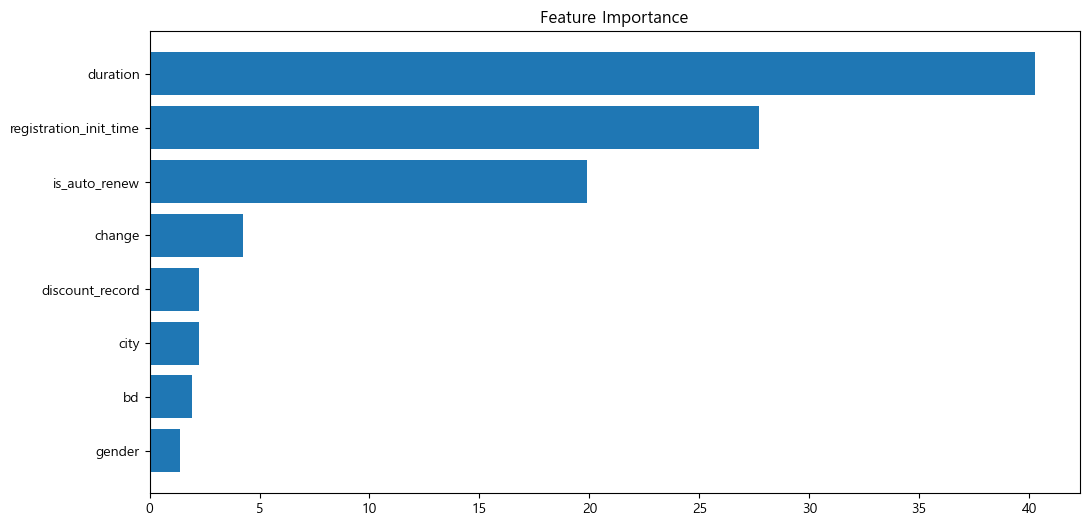

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


# duration , registration_init_time, auto_renew, change

### # user log 데이터 이용

In [163]:
df_list = [logterm_unconnect_list_train[0],membership_duration_train, user_logs, y]
df_list_1 = [logterm_unconnect_list_train_1[0],membership_duration_train_1,user_logs_1 , y_1]

df = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list)
df_1 = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list_1)

df_final = pd.concat([df,df_1])
df_final = df_final.drop_duplicates(subset=['msno_num'], keep='last')

In [164]:
columns = ['model',
           'Train Precision', 'Test Precision', 'Train Recall','Test Recall' ,'Train_f1','Test_f1',
              'Train Matrix','Test Matrix']
result = pd.DataFrame(columns=columns)

In [165]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(df_final)
print(len(df_final))
model.trainTestSplit()

for i in range(2):
    if i == 0: 
        model.modelLightGBM()
    else:       
        model.modelCatboost()             



    precision_train, precision_test , recall_train, recall_test, train_f1, test_f1, confusion_matrix_train , confusion_matrix_test = model.modelResult()

    sumary_list = [ model.model_name,
                    precision_train,precision_test, recall_train, recall_test, train_f1, test_f1,
                    confusion_matrix_train, confusion_matrix_test]
    
    result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)


209044
Split Complete
Learning rate set to 0.091684
0:	learn: 0.6241084	total: 38.6ms	remaining: 38.6s
1:	learn: 0.5714229	total: 60.8ms	remaining: 30.3s
2:	learn: 0.5306223	total: 84.6ms	remaining: 28.1s
3:	learn: 0.4982999	total: 105ms	remaining: 26.2s
4:	learn: 0.4718430	total: 130ms	remaining: 25.9s
5:	learn: 0.4496598	total: 157ms	remaining: 26.1s
6:	learn: 0.4309676	total: 180ms	remaining: 25.5s
7:	learn: 0.4175217	total: 202ms	remaining: 25s
8:	learn: 0.4062841	total: 231ms	remaining: 25.5s
9:	learn: 0.3978165	total: 258ms	remaining: 25.5s
10:	learn: 0.3908032	total: 284ms	remaining: 25.6s
11:	learn: 0.3856132	total: 300ms	remaining: 24.7s
12:	learn: 0.3797603	total: 321ms	remaining: 24.4s
13:	learn: 0.3759592	total: 345ms	remaining: 24.3s
14:	learn: 0.3721477	total: 365ms	remaining: 23.9s
15:	learn: 0.3687748	total: 389ms	remaining: 23.9s
16:	learn: 0.3666833	total: 408ms	remaining: 23.6s
17:	learn: 0.3642948	total: 429ms	remaining: 23.4s
18:	learn: 0.3612614	total: 455ms	remai

In [170]:
result.to_csv('only_log_data.csv')
# 유저로그는 너무 떨어지네,,,
# 그러면 하나만 딱 넣었을때는 어떨까???

<AxesSubplot: >

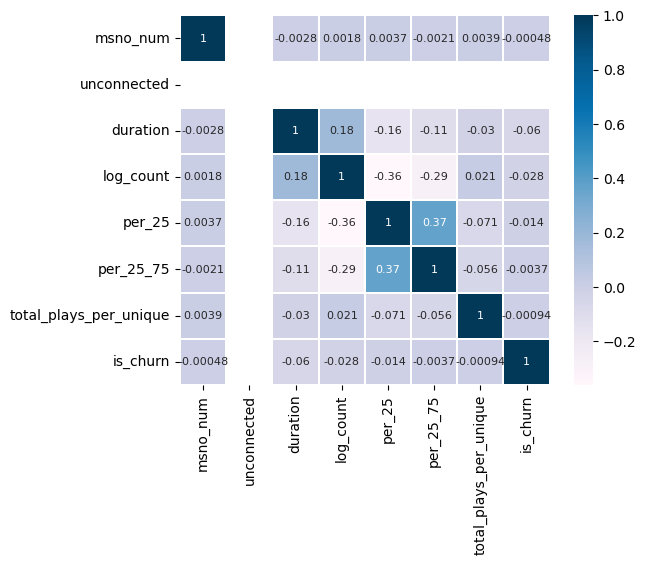

In [171]:
colormap = plt.cm.PuBu
sns.heatmap(df_final.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})

In [180]:
columns = ['model',
           'Train Precision', 'Test Precision', 'Train Recall','Test Recall' ,'Train_f1','Test_f1',
              'Train Matrix','Test Matrix']
result = pd.DataFrame(columns=columns)

In [181]:
df_list = [logterm_unconnect_list_train[0],age_category_list_train[0],gender_list_train[0],city_list_train[1], auto_renew_list_train[1],discount_train,payment_train2,init_regist_list_train[0],membership_duration_train, y ]
df_list_1 = [logterm_unconnect_list_train_1[0],age_category_list_train_1[0],gender_list_train_1[0],city_list_train_1[1], auto_renew_list_train_1[1], discount_train_1 , payment_train2_1, init_regist_list_train_1[0], membership_duration_train_1, y_1]

df = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list)
df_1 = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list_1)

df_final = pd.concat([df,df_1])
df_final = df_final.drop_duplicates(subset=['msno_num'], keep='last')

In [182]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(df_final)
print(len(df_final))
model.trainTestSplit()

for i in range(2):
    if i == 0: 
        model.modelLightGBM()
    else:       
        model.modelCatboost()             



    precision_train, precision_test , recall_train, recall_test, train_f1, test_f1, confusion_matrix_train , confusion_matrix_test = model.modelResult()

    sumary_list = [ model.model_name,
                    precision_train,precision_test, recall_train, recall_test, train_f1, test_f1,
                    confusion_matrix_train, confusion_matrix_test]
    
    result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)


209044
Split Complete
Learning rate set to 0.091684
0:	learn: 0.6061434	total: 31.7ms	remaining: 31.6s
1:	learn: 0.5374159	total: 56.1ms	remaining: 28s
2:	learn: 0.4859963	total: 82.4ms	remaining: 27.4s
3:	learn: 0.4446574	total: 103ms	remaining: 25.7s
4:	learn: 0.4130237	total: 128ms	remaining: 25.5s
5:	learn: 0.3887067	total: 153ms	remaining: 25.3s
6:	learn: 0.3706400	total: 178ms	remaining: 25.2s
7:	learn: 0.3538906	total: 198ms	remaining: 24.6s
8:	learn: 0.3418439	total: 221ms	remaining: 24.4s
9:	learn: 0.3322628	total: 249ms	remaining: 24.6s
10:	learn: 0.3249788	total: 276ms	remaining: 24.8s
11:	learn: 0.3177331	total: 299ms	remaining: 24.6s
12:	learn: 0.3128398	total: 323ms	remaining: 24.5s
13:	learn: 0.3083415	total: 347ms	remaining: 24.4s
14:	learn: 0.3049067	total: 372ms	remaining: 24.4s
15:	learn: 0.3011665	total: 397ms	remaining: 24.4s
16:	learn: 0.2983174	total: 422ms	remaining: 24.4s
17:	learn: 0.2967427	total: 447ms	remaining: 24.4s
18:	learn: 0.2944883	total: 474ms	remai

In [184]:
result.to_csv('LightGBM_high_user_data_one_log_data.csv')
# LightGBM 이 제일 높다..!

### # target 정하기

In [11]:
df_list = [age_category_list_train[0],gender_list_train[0],city_list_train[1], auto_renew_list_train[1],discount_train,payment_train2,init_regist_list_train[0],membership_duration_train, y ]
df_list_1 = [age_category_list_train_1[0],gender_list_train_1[0],city_list_train_1[1], auto_renew_list_train_1[1], discount_train_1 , payment_train2_1, init_regist_list_train_1[0], membership_duration_train_1, y_1]

df = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list)
df_1 = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list_1)

df_final = pd.concat([df,df_1])
df_final = df_final.drop_duplicates(subset=['msno_num'], keep='last')

In [16]:
from catboost import CatBoostClassifier
import numpy as np

In [17]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(df_final)
print(len(df_final))
model.trainTestSplit()

X_train = model.X_train
X_test = model.X_test
y_train = model.y_train
y_test = model.y_test

model = CatBoostClassifier()
model.fit(X_train, y_train)
   

209527
Split Complete
Learning rate set to 0.091775
0:	learn: 0.6056974	total: 30.8ms	remaining: 30.8s
1:	learn: 0.5369063	total: 59.9ms	remaining: 29.9s
2:	learn: 0.4857264	total: 89.1ms	remaining: 29.6s
3:	learn: 0.4443276	total: 114ms	remaining: 28.5s
4:	learn: 0.4126703	total: 144ms	remaining: 28.6s
5:	learn: 0.3866224	total: 173ms	remaining: 28.7s
6:	learn: 0.3679370	total: 204ms	remaining: 28.9s
7:	learn: 0.3528812	total: 233ms	remaining: 28.9s
8:	learn: 0.3399782	total: 262ms	remaining: 28.9s
9:	learn: 0.3292079	total: 288ms	remaining: 28.5s
10:	learn: 0.3227331	total: 312ms	remaining: 28s
11:	learn: 0.3147914	total: 340ms	remaining: 28s
12:	learn: 0.3092013	total: 363ms	remaining: 27.6s
13:	learn: 0.3045643	total: 393ms	remaining: 27.7s
14:	learn: 0.3015145	total: 423ms	remaining: 27.8s
15:	learn: 0.2992153	total: 452ms	remaining: 27.8s
16:	learn: 0.2964159	total: 478ms	remaining: 27.6s
17:	learn: 0.2937354	total: 502ms	remaining: 27.4s
18:	learn: 0.2920933	total: 530ms	remaini

TypeError: 'module' object is not callable

Text(0.5, 1.0, 'Feature Importance')

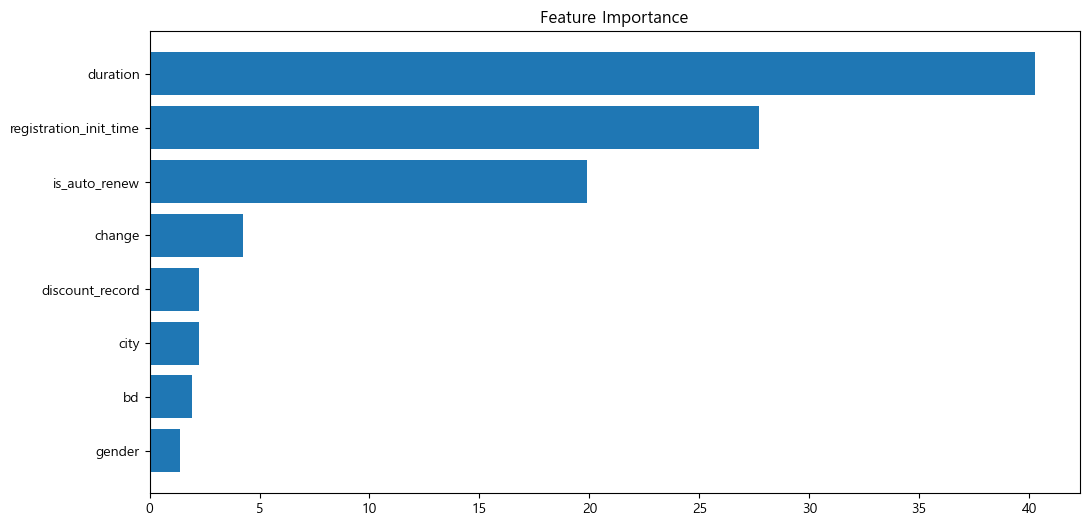

In [19]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


# duration , registration_init_time, auto_renew, change

In [109]:
X = df_final.drop(columns=['msno_num','duration','is_churn'])
scaler = StandardScaler()
X_pca = scaler.fit_transform(X)

In [110]:
pca = PCA()
df_pca = pca.fit_transform(X_pca)
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.458248
1    0.666616
2    0.779240
3    0.879472
4    0.947790
5    0.977674
6    1.000000
dtype: float64

In [111]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(X_pca)

In [112]:
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2','PCA3'])
df_pca.head()

,PCA1,PCA2,PCA3
0,-1.984357,0.088085,-0.174644
1,1.691836,-1.408921,-0.277566
2,-1.879779,-0.038788,-0.092858
3,-1.754740,-0.190484,0.004930
4,1.181176,0.571240,-1.614647


In [113]:
df_pca['duration'] = df_final['duration'].values

In [114]:
from sklearn import cluster

In [115]:
model = cluster.KMeans(init='k-means++', n_clusters=8, n_init=10)
model.fit(df_pca)

KMeans(n_init=10)

In [116]:
cluster_label = model.labels_
df_pca['Cluster'] = cluster_label

In [117]:
df_pca['is_churn'] = df_final['is_churn'].values

In [118]:
result = df_pca.groupby('Cluster').agg({'duration': ['min', 'max'], 'is_churn': 'mean'})
result = result.reset_index()

In [121]:
result = result.sort_values(by=('duration', 'min'))
result

Cluster duration      is_churn
               min max      mean
5       5        0   5  0.219036
1       1        5   9  0.101915
4       4       10  14  0.191583
3       3       15  19  0.081348
2       2       18  24  0.154342
0       0       23  31  0.110159
6       6       24  31  0.075571
7       7       31  40  0.537538

In [122]:
churn_user = df_final[(df_final['duration'] <= 14) & (df_final['is_churn'] == 1)]
churn_user

,msno_num,bd,gender,city,is_auto_renew,discount_record,change,registration_init_time,duration,is_churn
31,17926,5,0,1,1,0,0,201405,13,1
50,34049,5,0,1,1,0,0,201307,14,1
62,41221,5,0,1,0,0,0,201603,11,1
73,49845,0,1,0,0,0,0,201602,13,1
83,56778,0,0,1,0,0,1,201701,3,1
...,...,...,...,...,...,...,...,...,...,...
102630,7166332,0,2,0,1,0,1,201403,9,1
102717,7307569,3,1,1,0,0,0,201701,1,1
102721,7314378,2,1,1,0,0,0,201510,12,1
102740,7339216,5,0,1,1,0,0,201308,13,1


In [123]:
not_churn_user = df_final[(df_final['duration'] >= 15) &(df_final['duration'] <= 19) &(df_final['is_churn'] == 0)]
not_churn_user

,msno_num,bd,gender,city,is_auto_renew,discount_record,change,registration_init_time,duration,is_churn
3,2959,5,0,1,1,0,0,201401,15,0
7,3591,5,0,1,1,0,0,201512,16,0
11,6029,5,0,1,1,0,0,201511,17,0
17,11002,5,0,1,1,0,0,201509,19,0
32,18054,0,2,0,1,0,1,201411,18,0
...,...,...,...,...,...,...,...,...,...,...
102727,7320405,5,0,1,1,0,0,201601,15,0
102736,7331600,0,2,0,0,0,1,201502,19,0
102739,7338672,5,0,1,1,0,0,201601,15,0
102753,7361186,5,0,1,1,0,0,201510,18,0


In [124]:
target_user = pd.concat([churn_user,not_churn_user])

In [147]:
target_user.drop(['duration'],axis=1,inplace=True)
target_user.drop(['registration_init_time'],axis=1,inplace=True)

KeyError: "['duration'] not found in axis"

In [148]:
target_user.drop(['registration_init_time'],axis=1,inplace=True)

In [155]:
target_user.drop(['is_auto_renew'],axis=1,inplace=True)

In [156]:
target_user.head()

,msno_num,bd,gender,city,discount_record,change,is_churn
31,17926,5,0,1,0,0,1
50,34049,5,0,1,0,0,1
62,41221,5,0,1,0,0,1
73,49845,0,1,0,0,0,1
83,56778,0,0,1,0,1,1


#### transaction, member 데이터만 이용

In [169]:
columns = ['model',
           'Train Precision', 'Test Precision', 'Train Recall','Test Recall' ,'Train_f1','Test_f1',
              'Train Matrix','Test Matrix']
result = pd.DataFrame(columns=columns)

In [170]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(target_user)
model.trainTestSplit()

X_train = model.X_train
X_test = model.X_test
y_train = model.y_train
y_test = model.y_test

for i in range(2):
    if i == 0: 
        model.modelLightGBM()
    else:       
        model.modelCatboost()             



    precision_train, precision_test , recall_train, recall_test, train_f1, test_f1, confusion_matrix_train , confusion_matrix_test = model.modelResult()

    sumary_list = [ model.model_name,
                    precision_train,precision_test, recall_train, recall_test, train_f1, test_f1,
                    confusion_matrix_train, confusion_matrix_test]
    
    result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)

Split Complete
Learning rate set to 0.04593
0:	learn: 0.6787449	total: 10.5ms	remaining: 10.5s
1:	learn: 0.6657369	total: 24.5ms	remaining: 12.2s
2:	learn: 0.6540218	total: 35.3ms	remaining: 11.7s
3:	learn: 0.6434304	total: 44.3ms	remaining: 11s
4:	learn: 0.6339564	total: 53.5ms	remaining: 10.6s
5:	learn: 0.6256658	total: 61.8ms	remaining: 10.2s
6:	learn: 0.6178959	total: 72.5ms	remaining: 10.3s
7:	learn: 0.6118904	total: 79.2ms	remaining: 9.82s
8:	learn: 0.6055255	total: 91ms	remaining: 10s
9:	learn: 0.5997740	total: 104ms	remaining: 10.3s
10:	learn: 0.5945997	total: 112ms	remaining: 10.1s
11:	learn: 0.5898698	total: 122ms	remaining: 10s
12:	learn: 0.5856277	total: 130ms	remaining: 9.87s
13:	learn: 0.5822954	total: 139ms	remaining: 9.78s
14:	learn: 0.5788605	total: 146ms	remaining: 9.58s
15:	learn: 0.5756765	total: 156ms	remaining: 9.58s
16:	learn: 0.5733759	total: 162ms	remaining: 9.37s
17:	learn: 0.5710105	total: 169ms	remaining: 9.22s
18:	learn: 0.5685703	total: 178ms	remaining: 9.

In [171]:
result.to_csv('target_transaction.csv')

In [172]:
result

,model,Train Precision,Test Precision,Train Recall,Test Recall,Train_f1,Test_f1,Train Matrix,Test Matrix
0,LGBM,0.571850,0.578641,0.241169,0.240711,0.339260,0.339989,"[[21739, 1743], [7325, 2328]]","[[5374, 434], [1880, 596]]"
1,Catboost,0.572414,0.578794,0.240754,0.240307,0.338948,0.339612,"[[21746, 1736], [7329, 2324]]","[[5375, 433], [1881, 595]]"


Text(0.5, 1.0, 'Feature Importance')

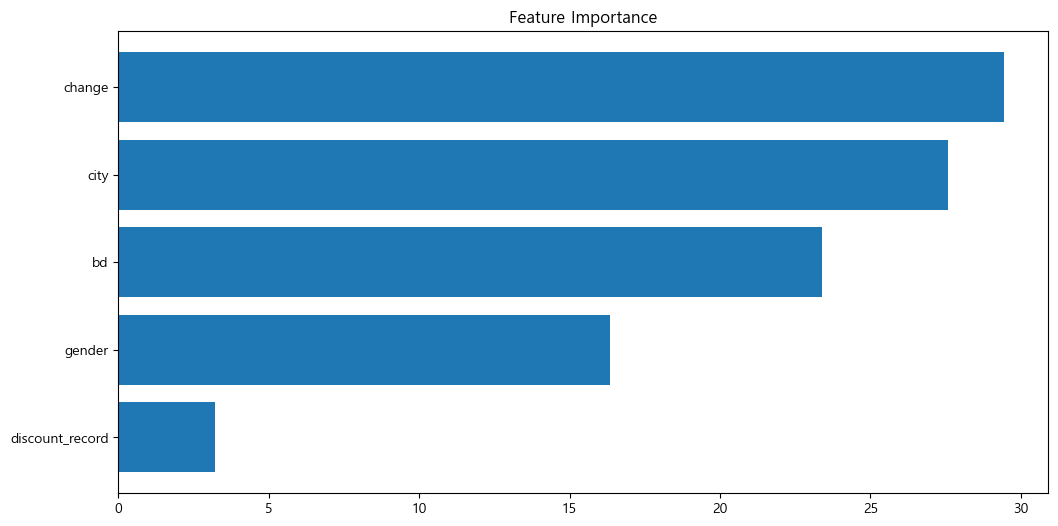

In [159]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


# duration , registration_init_time, auto_renew, change

In [160]:
recall_train ,recall_test

(0.24075416968817984, 0.2403069466882068)

#### log 데이터만 사용

In [162]:
user_log = pd.concat([user_group_train,user_group_train_1])

In [165]:
user_log.head()

,msno_num,log_count,total_secs,per_25,per_25_75,per_100,total_plays_per_unique
0,48,7.461538,9925.523692,0.194069,0.118498,0.687433,1.110315
1,53,8.050000,26676.536350,0.104445,0.048210,0.847345,1.040134
2,90,4.222222,20569.028778,0.080137,0.025601,0.894262,1.319104
3,160,9.400000,32000.129600,0.097705,0.053068,0.849227,1.689325
4,225,12.407407,57520.778296,0.101411,0.039931,0.858658,1.145041


In [167]:
target_user_log = pd.merge(target_user[['msno_num','is_churn']], user_log, on='msno_num')

In [176]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(target_user_log)
model.trainTestSplit()


X_train = model.X_train
X_test = model.X_test
y_train = model.y_train
y_test = model.y_test

model = CatBoostClassifier()
model.fit(X_train, y_train)

Split Complete
Learning rate set to 0.047066
0:	learn: 0.6841431	total: 14.6ms	remaining: 14.6s
1:	learn: 0.6758429	total: 25.6ms	remaining: 12.8s
2:	learn: 0.6682544	total: 37.5ms	remaining: 12.5s
3:	learn: 0.6615309	total: 48.7ms	remaining: 12.1s
4:	learn: 0.6554127	total: 58.6ms	remaining: 11.7s
5:	learn: 0.6500351	total: 85.3ms	remaining: 14.1s
6:	learn: 0.6449361	total: 96.5ms	remaining: 13.7s
7:	learn: 0.6402874	total: 109ms	remaining: 13.6s
8:	learn: 0.6360949	total: 119ms	remaining: 13.1s
9:	learn: 0.6323814	total: 130ms	remaining: 12.8s
10:	learn: 0.6289684	total: 139ms	remaining: 12.5s
11:	learn: 0.6258448	total: 153ms	remaining: 12.6s
12:	learn: 0.6230272	total: 165ms	remaining: 12.5s
13:	learn: 0.6206105	total: 175ms	remaining: 12.3s
14:	learn: 0.6182691	total: 186ms	remaining: 12.2s
15:	learn: 0.6161620	total: 198ms	remaining: 12.2s
16:	learn: 0.6142021	total: 211ms	remaining: 12.2s
17:	learn: 0.6124272	total: 226ms	remaining: 12.3s
18:	learn: 0.6108894	total: 239ms	remain

Text(0.5, 1.0, 'Feature Importance')

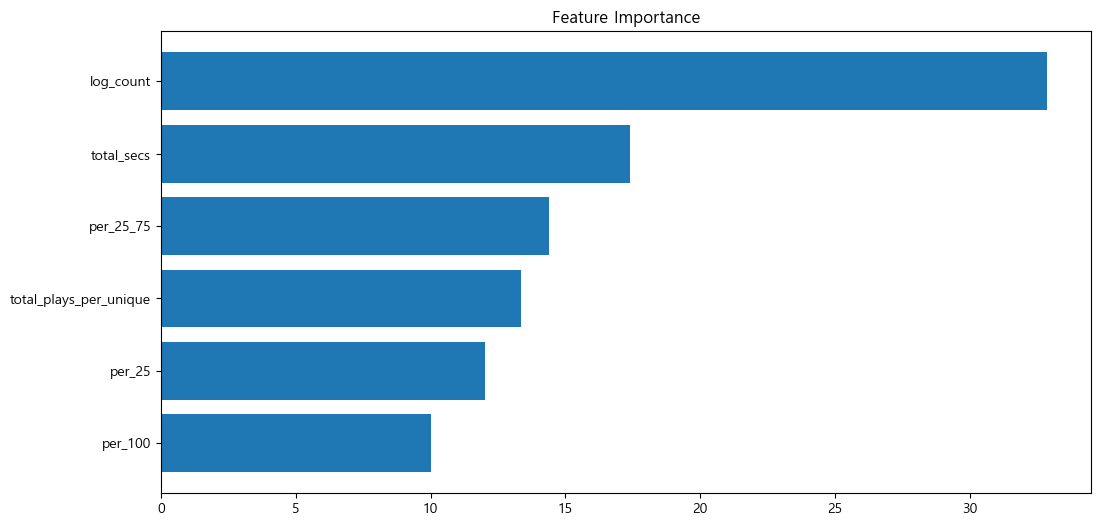

In [177]:

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [175]:
result.to_csv('user_target_result.csv')

#### 통합 사용

In [181]:
target_user_merge = pd.merge(target_user[['msno_num','bd','gender','city','change','is_churn']], target_user_log[['msno_num','log_count','total_secs']], on='msno_num')

In [182]:
columns = ['model',
           'Train Precision', 'Test Precision', 'Train Recall','Test Recall' ,'Train_f1','Test_f1',
              'Train Matrix','Test Matrix']
result = pd.DataFrame(columns=columns)

In [183]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(target_user_merge)
model.trainTestSplit()

X_train = model.X_train
X_test = model.X_test
y_train = model.y_train
y_test = model.y_test

for i in range(2):
    if i == 0: 
        model.modelLightGBM()
    else:       
        model.modelCatboost()             



    precision_train, precision_test , recall_train, recall_test, train_f1, test_f1, confusion_matrix_train , confusion_matrix_test = model.modelResult()

    sumary_list = [ model.model_name,
                    precision_train,precision_test, recall_train, recall_test, train_f1, test_f1,
                    confusion_matrix_train, confusion_matrix_test]
    
    result = result.append(pd.Series(sumary_list , index=result.columns), ignore_index=True)

Split Complete
Learning rate set to 0.047066
0:	learn: 0.6778358	total: 9.14ms	remaining: 9.13s
1:	learn: 0.6638217	total: 22.2ms	remaining: 11.1s
2:	learn: 0.6512963	total: 33.3ms	remaining: 11.1s
3:	learn: 0.6395772	total: 45ms	remaining: 11.2s
4:	learn: 0.6297684	total: 57.2ms	remaining: 11.4s
5:	learn: 0.6201967	total: 70.1ms	remaining: 11.6s
6:	learn: 0.6128556	total: 77.9ms	remaining: 11.1s
7:	learn: 0.6051415	total: 89.1ms	remaining: 11s
8:	learn: 0.5979989	total: 102ms	remaining: 11.2s
9:	learn: 0.5916701	total: 114ms	remaining: 11.3s
10:	learn: 0.5859659	total: 126ms	remaining: 11.3s
11:	learn: 0.5807673	total: 137ms	remaining: 11.3s
12:	learn: 0.5767530	total: 145ms	remaining: 11s
13:	learn: 0.5728360	total: 157ms	remaining: 11.1s
14:	learn: 0.5698583	total: 166ms	remaining: 10.9s
15:	learn: 0.5665387	total: 178ms	remaining: 10.9s
16:	learn: 0.5633330	total: 189ms	remaining: 10.9s
17:	learn: 0.5604915	total: 202ms	remaining: 11s
18:	learn: 0.5577777	total: 216ms	remaining: 11

In [185]:
result.to_csv('target_merge.csv')

### # 가중치 업로드

In [ ]:
### 모델 검증 ###
#### weight 포함

In [110]:
df_list = [age_category_list_train[0],city_list_train[1], auto_renew_list_train[1],discount_train,payment_train2,init_regist_list_train[0],membership_duration_train, y ]
df_list_1 = [age_category_list_train_1[0],city_list_train_1[1], auto_renew_list_train_1[1], discount_train_1 , payment_train2_1, init_regist_list_train_1[0], membership_duration_train_1, y_1]

df = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list)
df_1 = reduce(lambda left, right: pd.merge(left, right, on='msno_num'),df_list_1)

df_final = pd.concat([df,df_1])
df_final = df_final.drop_duplicates(subset=['msno_num'], keep='last')

In [111]:
df_final = pd.merge(merge_df[['msno_num',0]], df_final, on='msno_num',how='inner')

In [114]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(df_final)
print(len(df_final))
model.trainTestSplit()

for i in range(2):
    if i == 0: 
        model.modelLightGBM()
    else:       
        model.modelCatboost()            

    precision_train, precision_test , recall_train, recall_test, train_f1, test_f1, confusion_matrix_train , confusion_matrix_test = model.modelResult()

    print(precision_train, precision_test , recall_train, recall_test, train_f1, test_f1 )


209044
Split Complete
0.7423650568181818 0.7203119461183978 0.3856299575724036 0.37120935330654 0.507587713973534 0.48993369499698614
Learning rate set to 0.091684
0:	learn: 0.6055795	total: 25.8ms	remaining: 25.8s
1:	learn: 0.5368151	total: 50.4ms	remaining: 25.2s
2:	learn: 0.4860168	total: 75.3ms	remaining: 25s
3:	learn: 0.4444345	total: 97.4ms	remaining: 24.3s
4:	learn: 0.4125646	total: 118ms	remaining: 23.4s
5:	learn: 0.3873766	total: 138ms	remaining: 22.9s
6:	learn: 0.3686476	total: 165ms	remaining: 23.4s
7:	learn: 0.3539049	total: 190ms	remaining: 23.6s
8:	learn: 0.3424119	total: 216ms	remaining: 23.8s
9:	learn: 0.3334089	total: 245ms	remaining: 24.2s
10:	learn: 0.3263274	total: 264ms	remaining: 23.7s
11:	learn: 0.3188614	total: 284ms	remaining: 23.4s
12:	learn: 0.3133480	total: 306ms	remaining: 23.3s
13:	learn: 0.3091834	total: 332ms	remaining: 23.4s
14:	learn: 0.3049620	total: 356ms	remaining: 23.4s
15:	learn: 0.3017320	total: 383ms	remaining: 23.5s
16:	learn: 0.2993213	total: 

In [104]:
from catboost import CatBoostClassifier, Pool

In [121]:
model = Modeling.ModelingModule(path=path)
model.getDataFrame(df_final)
model.trainTestSplit()


X_train = model.X_train
X_test = model.X_test
y_train = model.y_train
y_test = model.y_test

model = CatBoostClassifier(max_depth = 15)
model.fit(X_train, y_train)


Split Complete
Learning rate set to 0.091684
0:	learn: 0.6050594	total: 29.9ms	remaining: 29.8s
1:	learn: 0.5390048	total: 47.4ms	remaining: 23.7s
2:	learn: 0.4788606	total: 403ms	remaining: 2m 14s
3:	learn: 0.4325996	total: 1.44s	remaining: 5m 59s
4:	learn: 0.4032685	total: 1.47s	remaining: 4m 51s
5:	learn: 0.3764677	total: 2.44s	remaining: 6m 45s
6:	learn: 0.3546976	total: 3.41s	remaining: 8m 3s
7:	learn: 0.3366570	total: 4.39s	remaining: 9m 4s
8:	learn: 0.3258141	total: 4.42s	remaining: 8m 6s
9:	learn: 0.3141257	total: 5.37s	remaining: 8m 51s
10:	learn: 0.3044867	total: 6.24s	remaining: 9m 21s
11:	learn: 0.2965786	total: 7.12s	remaining: 9m 46s
12:	learn: 0.2904283	total: 8.01s	remaining: 10m 8s
13:	learn: 0.2854769	total: 8.93s	remaining: 10m 28s
14:	learn: 0.2805848	total: 9.86s	remaining: 10m 47s
15:	learn: 0.2771716	total: 10.8s	remaining: 11m 7s
16:	learn: 0.2741569	total: 11.9s	remaining: 11m 25s
17:	learn: 0.2715907	total: 12.9s	remaining: 11m 46s
18:	learn: 0.2685031	total: 

KeyboardInterrupt: 

In [117]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [118]:
y_pred_tr = model.predict(X_train)
y_pred_test = model.predict(X_test)
precision_train = precision_score(y_train, y_pred_tr)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_tr)
recall_test = recall_score(y_test, y_pred_test)
train_f1 =  (2 *precision_train *recall_train) / (precision_train + recall_train)
test_f1 =  (2 *precision_test *recall_test) / (precision_test + recall_test)
confusion_matrix_train = confusion_matrix(y_train, y_pred_tr)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

In [120]:
print(recall_train)

0.5810736026563365


In [108]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Feature Importance')

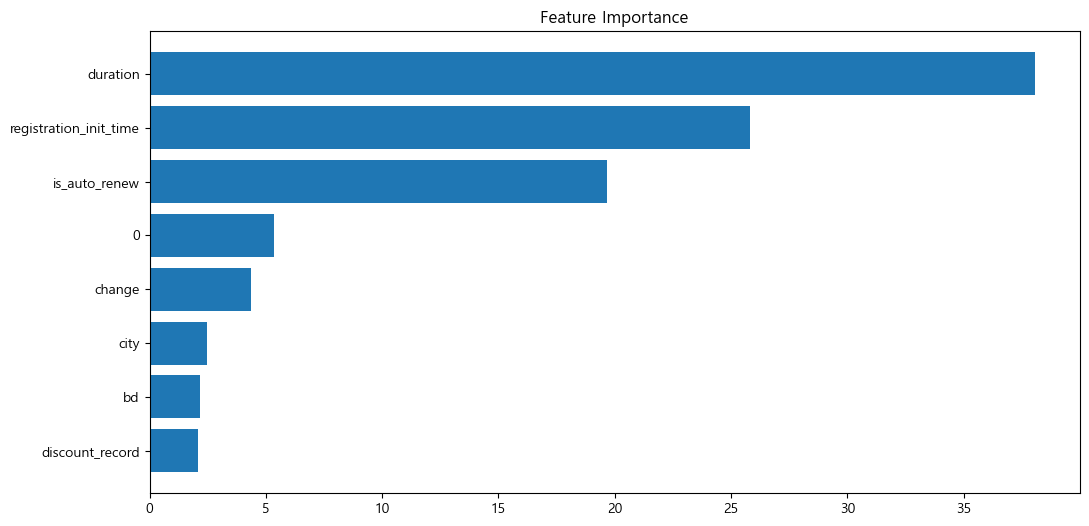

In [113]:

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')